In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Normality tests
from scipy.stats import normaltest as dagostino_test # D'Agostino test
from scipy.stats import anderson as and_dar_test # Anderson-Darling Test
from scipy.stats import kstest as kol_smi_test # Kolmogorov-Smirnov Test
from scipy.stats import shapiro as shap_wil_test # Shapiro-Wilk Test
from scipy.stats import jarque_bera as jarque_bera_test # Jarque-Bera Test

# ANOVA
from scipy.stats import f_oneway # Parametric
from scipy.stats import kruskal # Non-Parametric

# Statistical Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scikit_posthocs import posthoc_dunn

from scipy.stats import gamma
from fitter import Fitter

In [34]:
data = pd.read_csv('D:/thesis_data/VEG_INDICES/samples/stratified/florestal/FF_20170112_patches.csv')

In [35]:
data

,dprvi_patch_0,prvi_patch_0,dpsvi_patch_0,dpsvim_patch_0,rvi_patch_0,dprvi_patch_1,prvi_patch_1,dpsvi_patch_1,dpsvim_patch_1,rvi_patch_1,...,dprvi_patch_48,prvi_patch_48,dpsvi_patch_48,dpsvim_patch_48,rvi_patch_48,dprvi_patch_49,prvi_patch_49,dpsvi_patch_49,dpsvim_patch_49,rvi_patch_49
0,0.599862,0.009477,0.057255,0.014609,0.937537,0.619999,0.011368,0.089872,0.065781,0.799297,...,0.383123,0.002457,0.062069,0.011608,1.060818,0.322066,0.002396,0.044067,0.011827,0.839376
1,0.776704,0.015847,0.087430,0.015775,1.195705,0.721168,0.014302,0.086111,0.035466,0.934682,...,0.397021,0.002948,0.046813,0.015747,0.796427,0.253215,0.001773,0.070302,0.017275,1.018138
2,0.772433,0.015375,0.097540,0.018192,1.224967,0.850786,0.019237,0.098779,0.019244,1.214929,...,0.411548,0.002901,0.040355,0.015567,0.718082,0.225907,0.001462,0.067990,0.018009,0.983813
3,0.702428,0.012733,0.083410,0.025197,1.014094,0.936778,0.023563,0.082493,0.015303,1.165118,...,0.372037,0.002229,0.038293,0.013224,0.730841,0.316427,0.002446,0.059921,0.017157,0.918714
4,0.693532,0.013426,0.062940,0.024835,0.844792,0.929705,0.022152,0.043222,0.016041,0.747351,...,0.292334,0.001326,0.039356,0.016925,0.684770,0.441040,0.004386,0.062387,0.020824,0.888019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.344550,0.003715,0.068215,0.069337,0.645610,0.338613,0.006765,0.036949,0.028066,0.546086,...,0.617295,0.007395,0.055278,0.029041,0.732485,0.554117,0.005344,0.038117,0.007394,0.886734
96,0.334953,0.003333,0.063787,0.062031,0.636078,0.308813,0.005379,0.042819,0.040510,0.539484,...,0.540711,0.005497,0.048304,0.026704,0.682279,0.604523,0.005744,0.033647,0.007522,0.807854
97,0.325340,0.002821,0.070441,0.047848,0.742525,0.315014,0.005341,0.053878,0.055624,0.579764,...,0.435424,0.003924,0.037427,0.014975,0.688259,0.634518,0.007126,0.029932,0.026448,0.471098
98,0.260474,0.001784,0.084475,0.028836,0.982097,0.378423,0.007320,0.063121,0.063420,0.626682,...,0.444649,0.003583,0.032198,0.013986,0.629181,0.629018,0.007842,0.031085,0.029765,0.465362


In [86]:
data_p = data['dprvi_patch_13']
data_q = data['dprvi_patch_14']

In [87]:
[a_p, loc_p, scale_p] = gamma.fit(data_p)
[a_q, loc_q, scale_q] = gamma.fit(data_q)

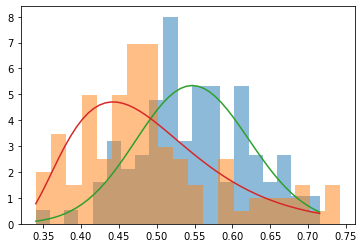

In [88]:
x = np.linspace(np.min(data_p), np.max(data_p))

plt.hist(data_p, bins=20, density=True, alpha=0.5)
plt.hist(data_q, bins=20, density=True, alpha=0.5)

plt.plot(x, gamma.pdf(x, a_p, loc_p, scale_p))
plt.plot(x, gamma.pdf(x, a_q, loc_q, scale_q))

In [89]:
from scipy.stats import chi2
from scipy.special import psi
from math import log

In [128]:
kp = a_p
kq = a_q
thetap = scale_p
thetaq = scale_q

dskl = ((kp - kq) * (psi(kp) + log(thetap) - psi(kq) - log(thetaq)) + ((kp*thetap - kq*thetaq) * ((thetap - thetaq) / (thetap * thetaq)))) / 2

m = data_p.count()
n = data_q.count()
v = 1

s = ((2*m*n*v) / (m + n)) * dskl
 
p_value = chi2.sf(s, df=2)

if p_value <= 0.05:
    print('Reject H0')

Reject H0


In [130]:
(2*m*n*v) / (m + n)

100.0

In [125]:
dskl

5578.302630094478

In [126]:
p_value

0.0

In [127]:
s

557830.2630094478